<a href="https://colab.research.google.com/github/Yash-Kamtekar/Data-Mining/blob/main/255_assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **importing all the libraries together**

In [1]:
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
import json

### **Mounting google drive to collab**

In [2]:
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **DATA LOADING**

In [3]:
df = pd.read_csv("/content/drive/MyDrive/255/dataset/USvideos.csv")
df

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40944,BZt0qjTWNhw,18.14.06,The Cat Who Caught the Laser,AaronsAnimals,15,2018-05-18T13:00:04.000Z,"aarons animals|""aarons""|""animals""|""cat""|""cats""...",1685609,38160,1385,2657,https://i.ytimg.com/vi/BZt0qjTWNhw/default.jpg,False,False,False,The Cat Who Caught the Laser - Aaron's Animals
40945,1h7KV2sjUWY,18.14.06,True Facts : Ant Mutualism,zefrank1,22,2018-05-18T01:00:06.000Z,[none],1064798,60008,382,3936,https://i.ytimg.com/vi/1h7KV2sjUWY/default.jpg,False,False,False,NaN
40946,D6Oy4LfoqsU,18.14.06,I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...,Brad Mondo,24,2018-05-18T17:34:22.000Z,I gave safiya nygaard a perfect hair makeover ...,1066451,48068,1032,3992,https://i.ytimg.com/vi/D6Oy4LfoqsU/default.jpg,False,False,False,I had so much fun transforming Safiyas hair in...
40947,oV0zkMe1K8s,18.14.06,How Black Panther Should Have Ended,How It Should Have Ended,1,2018-05-17T17:00:04.000Z,"Black Panther|""HISHE""|""Marvel""|""Infinity War""|...",5660813,192957,2846,13088,https://i.ytimg.com/vi/oV0zkMe1K8s/default.jpg,False,False,False,How Black Panther Should Have EndedWatch More ...


### **Checking the size of the data frame**


In [4]:
df.shape

(40949, 16)

There 40949 rows and 16 columns

### **Dropping all the duplicates row if they exists**

In [5]:
df.drop_duplicates()
df.shape

(40949, 16)

There are no duplicate rows

# **Data Cleaning**
### **checking the first 3 rows of the data frame to understand the data**

In [6]:
df.head(3)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...


### **Check if there are any columns with null value**

In [7]:
df.isnull().sum()

video_id                    0
trending_date               0
title                       0
channel_title               0
category_id                 0
publish_time                0
tags                        0
views                       0
likes                       0
dislikes                    0
comment_count               0
thumbnail_link              0
comments_disabled           0
ratings_disabled            0
video_error_or_removed      0
description               570
dtype: int64

We can see that there is only one column with null values.

### We can see that video_id, tags, thumbnail_link and description are the columns which we don't need as there is nothing to draw conclusion from these columns also **description** has null values, so we will drop these columns from our data frame and store them in a new data frame.

In [8]:
df1 = df.drop(["video_id", "tags", "thumbnail_link", "description"], axis = "columns")
df1.head(3)

,trending_date,title,channel_title,category_id,publish_time,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed
0,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,748374,57527,2966,15954,False,False,False
1,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,2418783,97185,6146,12703,False,False,False
2,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,3191434,146033,5339,8181,False,False,False


### **Checking the data types of all the column**

In [9]:
df1.dtypes

trending_date             object
title                     object
channel_title             object
category_id                int64
publish_time              object
views                      int64
likes                      int64
dislikes                   int64
comment_count              int64
comments_disabled           bool
ratings_disabled            bool
video_error_or_removed      bool
dtype: object

### **Check the trending date column value**
We can see that trending_date column is actually a column which has dates but the data type of this column is object. So we will convert the data type to datetime object of python.

In [10]:
df1["trending_date"]

0        17.14.11
1        17.14.11
2        17.14.11
3        17.14.11
4        17.14.11
           ...   
40944    18.14.06
40945    18.14.06
40946    18.14.06
40947    18.14.06
40948    18.14.06
Name: trending_date, Length: 40949, dtype: object

### We can see that trending_date column is actually a column which has dates but the data type of this column is object. So we will convert the data type to datetime object of python.

In [11]:
df1["trending_date"] = pd.to_datetime(df1["trending_date"], format="%y.%d.%m")

### **Verify the data type**

In [12]:
df1["trending_date"]

0       2017-11-14
1       2017-11-14
2       2017-11-14
3       2017-11-14
4       2017-11-14
           ...    
40944   2018-06-14
40945   2018-06-14
40946   2018-06-14
40947   2018-06-14
40948   2018-06-14
Name: trending_date, Length: 40949, dtype: datetime64[ns]

### Confirm the changed data type of trending_date column.

In [13]:
df1.dtypes

trending_date             datetime64[ns]
title                             object
channel_title                     object
category_id                        int64
publish_time                      object
views                              int64
likes                              int64
dislikes                           int64
comment_count                      int64
comments_disabled                   bool
ratings_disabled                    bool
video_error_or_removed              bool
dtype: object

###Check the data type of the publish time column.

In [14]:
df1["publish_time"]

0        2017-11-13T17:13:01.000Z
1        2017-11-13T07:30:00.000Z
2        2017-11-12T19:05:24.000Z
3        2017-11-13T11:00:04.000Z
4        2017-11-12T18:01:41.000Z
                   ...           
40944    2018-05-18T13:00:04.000Z
40945    2018-05-18T01:00:06.000Z
40946    2018-05-18T17:34:22.000Z
40947    2018-05-17T17:00:04.000Z
40948    2018-05-17T17:09:38.000Z
Name: publish_time, Length: 40949, dtype: object

### We can see that this column has a timestamp but the data type is an object so we will convert the data type of this column to datetime object as well.

In [15]:
df1["publish_time"] = pd.to_datetime(df1["publish_time"])

### Verify the publish time column data.

In [16]:
df1["publish_time"]

0       2017-11-13 17:13:01+00:00
1       2017-11-13 07:30:00+00:00
2       2017-11-12 19:05:24+00:00
3       2017-11-13 11:00:04+00:00
4       2017-11-12 18:01:41+00:00
                   ...           
40944   2018-05-18 13:00:04+00:00
40945   2018-05-18 01:00:06+00:00
40946   2018-05-18 17:34:22+00:00
40947   2018-05-17 17:00:04+00:00
40948   2018-05-17 17:09:38+00:00
Name: publish_time, Length: 40949, dtype: datetime64[ns, UTC]

### Confirm the changed data type of trending_date column.

In [17]:
df1.dtypes

trending_date                  datetime64[ns]
title                                  object
channel_title                          object
category_id                             int64
publish_time              datetime64[ns, UTC]
views                                   int64
likes                                   int64
dislikes                                int64
comment_count                           int64
comments_disabled                        bool
ratings_disabled                         bool
video_error_or_removed                   bool
dtype: object

### **Check the unique category**

In [18]:
df1["category_id"].unique()

array([22, 24, 23, 28,  1, 25, 17, 10, 15, 27, 26,  2, 19, 20, 29, 43])

### **Let us now import the mapping of category_id from the json file given in the data set.**
### **We have now created an object which has category_id has the key and category_name as the value**

In [19]:
category_name = open("/content/drive/MyDrive/255/dataset/US_category_id.json")
category_name = json.load(category_name)
category_names = {}
for category_name in category_name["items"]:
  category_names[category_name["id"]] = category_name["snippet"]["title"]
category_names

{'1': 'Film & Animation',
 '10': 'Music',
 '15': 'Pets & Animals',
 '17': 'Sports',
 '18': 'Short Movies',
 '19': 'Travel & Events',
 '2': 'Autos & Vehicles',
 '20': 'Gaming',
 '21': 'Videoblogging',
 '22': 'People & Blogs',
 '23': 'Comedy',
 '24': 'Entertainment',
 '25': 'News & Politics',
 '26': 'Howto & Style',
 '27': 'Education',
 '28': 'Science & Technology',
 '29': 'Nonprofits & Activism',
 '30': 'Movies',
 '31': 'Anime/Animation',
 '32': 'Action/Adventure',
 '33': 'Classics',
 '34': 'Comedy',
 '35': 'Documentary',
 '36': 'Drama',
 '37': 'Family',
 '38': 'Foreign',
 '39': 'Horror',
 '40': 'Sci-Fi/Fantasy',
 '41': 'Thriller',
 '42': 'Shorts',
 '43': 'Shows',
 '44': 'Trailers'}

###**Let us add this mapping in our data frame.**

In [20]:
df1["category_name"] = df1["category_id"].apply(lambda x: category_names[str(x)])
df1

,trending_date,title,channel_title,category_id,publish_time,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,category_name
0,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13 17:13:01+00:00,748374,57527,2966,15954,False,False,False,People & Blogs
1,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13 07:30:00+00:00,2418783,97185,6146,12703,False,False,False,Entertainment
2,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12 19:05:24+00:00,3191434,146033,5339,8181,False,False,False,Comedy
3,2017-11-14,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13 11:00:04+00:00,343168,10172,666,2146,False,False,False,Entertainment
4,2017-11-14,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12 18:01:41+00:00,2095731,132235,1989,17518,False,False,False,Entertainment
...,...,...,...,...,...,...,...,...,...,...,...,...,...
40944,2018-06-14,The Cat Who Caught the Laser,AaronsAnimals,15,2018-05-18 13:00:04+00:00,1685609,38160,1385,2657,False,False,False,Pets & Animals
40945,2018-06-14,True Facts : Ant Mutualism,zefrank1,22,2018-05-18 01:00:06+00:00,1064798,60008,382,3936,False,False,False,People & Blogs
40946,2018-06-14,I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...,Brad Mondo,24,2018-05-18 17:34:22+00:00,1066451,48068,1032,3992,False,False,False,Entertainment
40947,2018-06-14,How Black Panther Should Have Ended,How It Should Have Ended,1,2018-05-17 17:00:04+00:00,5660813,192957,2846,13088,False,False,False,Film & Animation


### **Data Visualation**
plotting number of views for each video. No major conclusion regarding distribution of views possible from this histogram, but we can see that highest viewed video have around 240 million views.


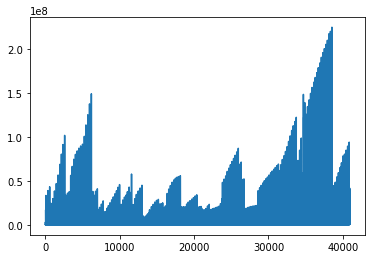

In [21]:
df1["views"].plot()

Plotting boxplot to get an idea about the distribution of views, but due to extremely right skewed data, box plot isn't the best approach. Still we can see here that the first second and third quartile are around 5 - 10 million views only.

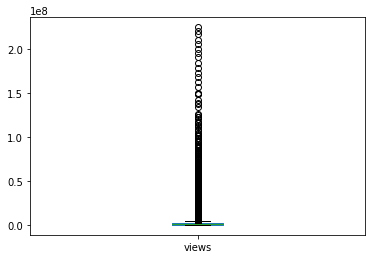

In [22]:
df1["views"].plot.box()

Plotting density graph to get an idea about the distribution of views, but it didn't help.

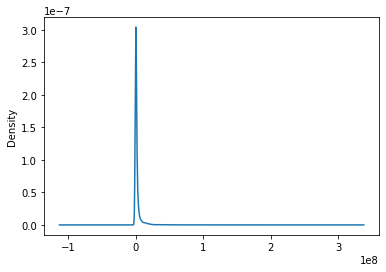

In [23]:
df1["views"].plot.density()

###**Let us now plot a graph of likes.**

We can see that histogram of likes is also similar to the histogram views and we cannot interept anything.

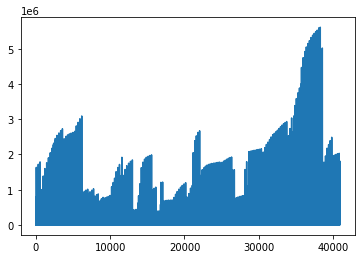

In [24]:
df1["likes"].plot()

We can see that boxplot of likes is also similar to the boxplot of views.
We can see that first quartile and third quartile is around 100,000 likes.

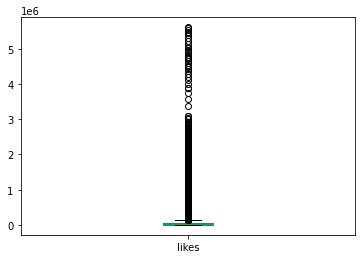

In [25]:
df1["likes"].plot.box()

The density plot of likes is also similar to the desity plot of views and no conclusion can be drawn.

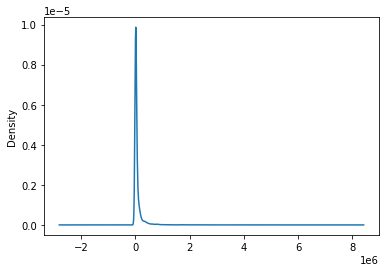

In [26]:
df1["likes"].plot.density()

This graph shows the maximum dislikes that videos have got are little less than 2 millions. 

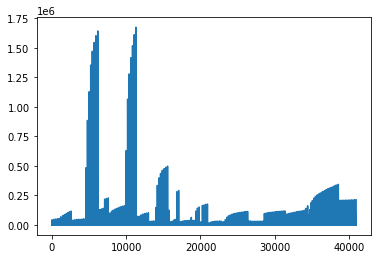

In [27]:
df1["dislikes"].plot()

The first and third quartile range all left skewed and no major conclusion can be drawn.

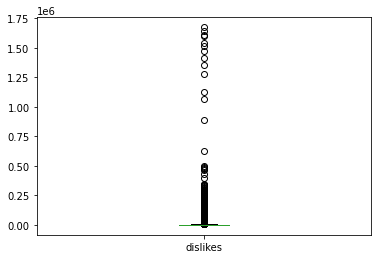

In [28]:
df1["dislikes"].plot.box()

The density plot of all three graphs views, likes and dislikes are the same and no conclusion can be drawn.

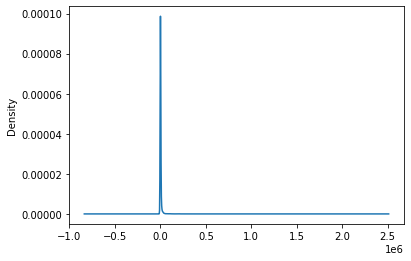

In [29]:
df1["dislikes"].plot.density()

Let us now add a log_view column as the data is skewed.

In [30]:
df1["log_views"] = df1["views"].apply(lambda x:math.log(x,2))
df1

,trending_date,title,channel_title,category_id,publish_time,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,category_name,log_views
0,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13 17:13:01+00:00,748374,57527,2966,15954,False,False,False,People & Blogs,19.513400
1,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13 07:30:00+00:00,2418783,97185,6146,12703,False,False,False,Entertainment,21.205850
2,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12 19:05:24+00:00,3191434,146033,5339,8181,False,False,False,Comedy,21.605773
3,2017-11-14,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13 11:00:04+00:00,343168,10172,666,2146,False,False,False,Entertainment,18.388556
4,2017-11-14,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12 18:01:41+00:00,2095731,132235,1989,17518,False,False,False,Entertainment,20.999022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40944,2018-06-14,The Cat Who Caught the Laser,AaronsAnimals,15,2018-05-18 13:00:04+00:00,1685609,38160,1385,2657,False,False,False,Pets & Animals,20.684838
40945,2018-06-14,True Facts : Ant Mutualism,zefrank1,22,2018-05-18 01:00:06+00:00,1064798,60008,382,3936,False,False,False,People & Blogs,20.022148
40946,2018-06-14,I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...,Brad Mondo,24,2018-05-18 17:34:22+00:00,1066451,48068,1032,3992,False,False,False,Entertainment,20.024386
40947,2018-06-14,How Black Panther Should Have Ended,How It Should Have Ended,1,2018-05-17 17:00:04+00:00,5660813,192957,2846,13088,False,False,False,Film & Animation,22.432578


Plotting a histogram of log_view column, but does not help make any conclusion.

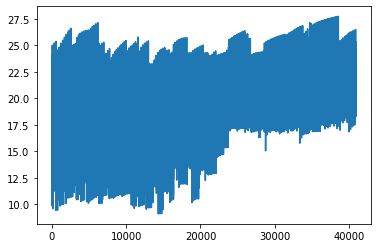

In [31]:
df1["log_views"].plot()

Plotting a box plot of log view column helps in understanding the data better as now, the first quartile, median and third quartile are more spaced and then the interquatile data.

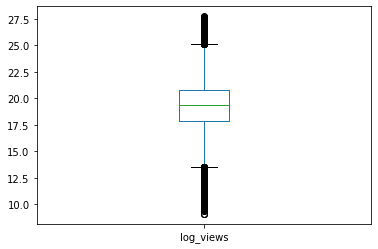

In [32]:
df1["log_views"].plot.box()

This density graphs shows of log views is bell shapped graph.

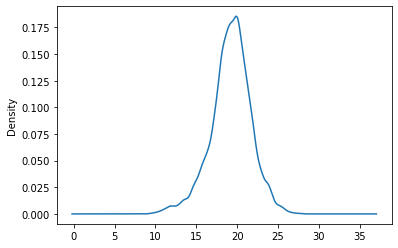

In [33]:
df1["log_views"].plot.density()

#**Similarly we can create 2 more columns of log_likes and log_dislikes to visualize the data better**

### **Now, let's create a new column of (likes/views) % to see the how many people who viewed the video actually liked the video.**

In [34]:
df1["like %"] = (df1["likes"] / df1["views"]) * 100
df1

,trending_date,title,channel_title,category_id,publish_time,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,category_name,log_views,like %
0,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13 17:13:01+00:00,748374,57527,2966,15954,False,False,False,People & Blogs,19.513400,7.686932
1,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13 07:30:00+00:00,2418783,97185,6146,12703,False,False,False,Entertainment,21.205850,4.017930
2,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12 19:05:24+00:00,3191434,146033,5339,8181,False,False,False,Comedy,21.605773,4.575780
3,2017-11-14,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13 11:00:04+00:00,343168,10172,666,2146,False,False,False,Entertainment,18.388556,2.964146
4,2017-11-14,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12 18:01:41+00:00,2095731,132235,1989,17518,False,False,False,Entertainment,20.999022,6.309732
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40944,2018-06-14,The Cat Who Caught the Laser,AaronsAnimals,15,2018-05-18 13:00:04+00:00,1685609,38160,1385,2657,False,False,False,Pets & Animals,20.684838,2.263870
40945,2018-06-14,True Facts : Ant Mutualism,zefrank1,22,2018-05-18 01:00:06+00:00,1064798,60008,382,3936,False,False,False,People & Blogs,20.022148,5.635623
40946,2018-06-14,I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...,Brad Mondo,24,2018-05-18 17:34:22+00:00,1066451,48068,1032,3992,False,False,False,Entertainment,20.024386,4.507286
40947,2018-06-14,How Black Panther Should Have Ended,How It Should Have Ended,1,2018-05-17 17:00:04+00:00,5660813,192957,2846,13088,False,False,False,Film & Animation,22.432578,3.408645


We can conclude that about 30% of people actually like a video which they watch.

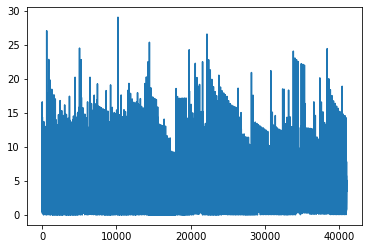

In [35]:
df1["like %"].plot()

We can clearly see that the median is towards the left and it maybe a left skewed graph.

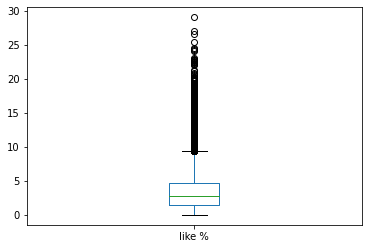

In [36]:
df1["like %"].plot.box()

So we can conclude that the data is left skewed from the density graph.

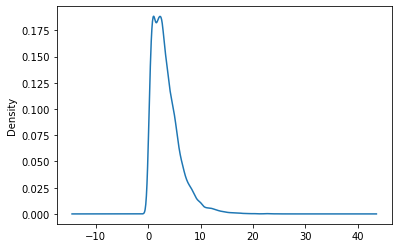

In [37]:
df1["like %"].plot.density()

In this bar graph we can see that **music** is the most watched category by viewers followed by **Entertainment**.

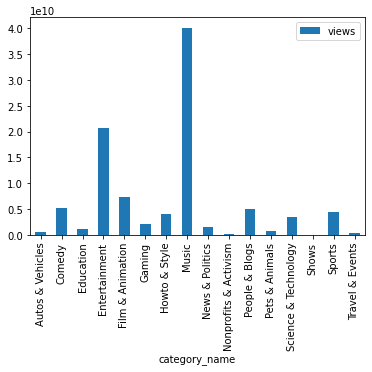

In [38]:
df1[["category_name", "views"]].groupby(by = "category_name").sum().plot.bar()

This graph shows that most likes are given to **music** videos.

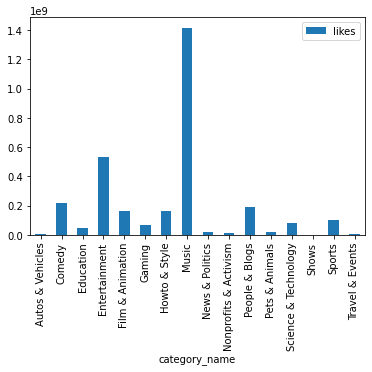

In [39]:
df1[["category_name", "likes"]].groupby(by = "category_name").sum().plot.bar()

So we can see that **music** videos has the most dislikes.

Hence we can conclude that the video which has the most views might have more likes than dislikes.

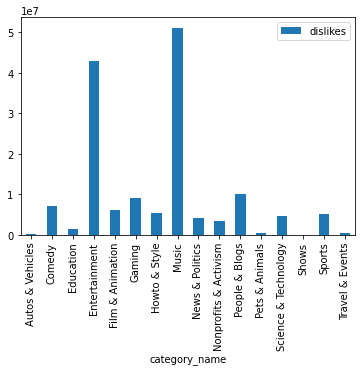

In [40]:
df1[["category_name", "dislikes"]].groupby(by = "category_name").sum().plot.bar()

### Let us plot a scatter plot to understand the data better.
We can see that the more the dislikes for the video lesser are the views for it, similarly more the likes more are the views.

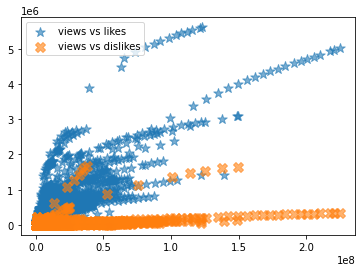

In [41]:
plt.scatter(df1["views"], df1["likes"], marker = "*", alpha = 0.6, s = 100, label = "views vs likes")
plt.scatter(df1["views"], df1["dislikes"], marker = "X", alpha = 0.6, s = 100, label = "views vs dislikes")
plt.legend()

We can conclude that **Films & Animation** videos has had most videos removed or has had most errors followed by **Entertainment.**

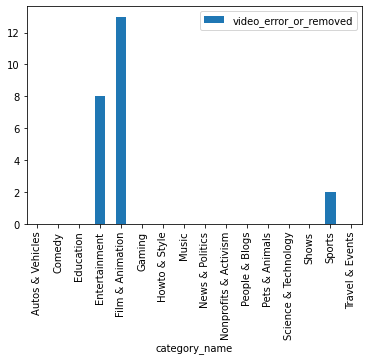

In [42]:
df1[["category_name", "video_error_or_removed"]].groupby(by = "category_name").sum().plot.bar()

Let us now create a new column of year_month to see the trends of the data.

In [43]:
df1["year_month"] = df1["trending_date"].apply(lambda x:str(x)[:7])
df1

,trending_date,title,channel_title,category_id,publish_time,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,category_name,log_views,like %,year_month
0,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13 17:13:01+00:00,748374,57527,2966,15954,False,False,False,People & Blogs,19.513400,7.686932,2017-11
1,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13 07:30:00+00:00,2418783,97185,6146,12703,False,False,False,Entertainment,21.205850,4.017930,2017-11
2,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12 19:05:24+00:00,3191434,146033,5339,8181,False,False,False,Comedy,21.605773,4.575780,2017-11
3,2017-11-14,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13 11:00:04+00:00,343168,10172,666,2146,False,False,False,Entertainment,18.388556,2.964146,2017-11
4,2017-11-14,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12 18:01:41+00:00,2095731,132235,1989,17518,False,False,False,Entertainment,20.999022,6.309732,2017-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40944,2018-06-14,The Cat Who Caught the Laser,AaronsAnimals,15,2018-05-18 13:00:04+00:00,1685609,38160,1385,2657,False,False,False,Pets & Animals,20.684838,2.263870,2018-06
40945,2018-06-14,True Facts : Ant Mutualism,zefrank1,22,2018-05-18 01:00:06+00:00,1064798,60008,382,3936,False,False,False,People & Blogs,20.022148,5.635623,2018-06
40946,2018-06-14,I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...,Brad Mondo,24,2018-05-18 17:34:22+00:00,1066451,48068,1032,3992,False,False,False,Entertainment,20.024386,4.507286,2018-06
40947,2018-06-14,How Black Panther Should Have Ended,How It Should Have Ended,1,2018-05-17 17:00:04+00:00,5660813,192957,2846,13088,False,False,False,Film & Animation,22.432578,3.408645,2018-06


This graph shows that in May 2018 people viewed more videos compared to last 6 months. 

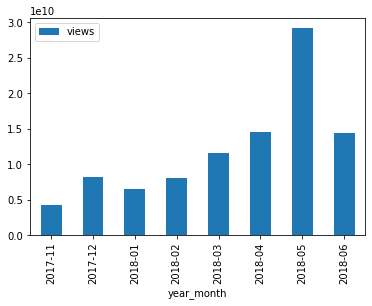

In [44]:
df1[["year_month", "views"]].groupby(by = "year_month").sum().plot.bar()

The likes in May 2018 was the highest and dislikes of videos have been almost in the same range.

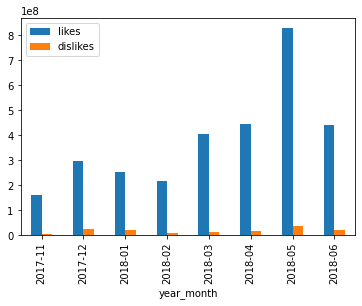

In [45]:
df1[["year_month", "likes", "dislikes"]].groupby(by = "year_month").sum().plot.bar()

A graph of year_month vs like % shows that Ratio of like by view is the highest in December 2017.

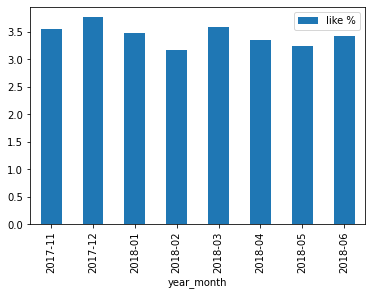

In [46]:
df1[["year_month", "like %"]].groupby(by = "year_month").mean().plot.bar()

###**Making a data frame of likes views by category_name**


In [68]:
df2 = df1[["category_name", "likes", "dislikes", "views"]].groupby(by = "category_name").sum()
df2["like %"] = df2["likes"] / df2["views"] * 100
df2

,likes,dislikes,views,like %
category_name,,,,
Autos & Vehicles,4245656,243010,520690717,0.815389
Comedy,216346746,7230391,5117426208,4.227648
Education,49257772,1351972,1180629990,4.172160
Entertainment,530516491,42987663,20604388195,2.574774
Film & Animation,165997476,6075148,7284156721,2.278884
Gaming,69038284,9184466,2141218625,3.224252
Howto & Style,162880075,5473899,4078545064,3.993583
Music,1416838584,51179008,40132892190,3.530368
News & Politics,18151033,4180049,1473765704,1.231609


So this graph helps us visualise that the **Nonprofits & Activism** videos has more like by views.

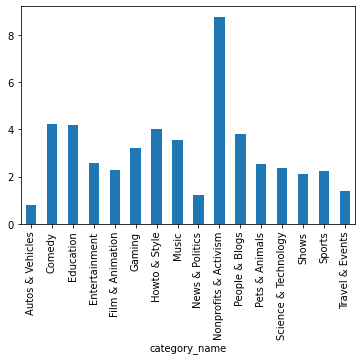

In [48]:
df2["like %"].plot.bar()

Now lets create a new data frame for channel titles.

In [63]:
df3 = df1[["channel_title", "likes", "dislikes", "views", "like %"]].groupby(by = "channel_title").sum()
df3

,likes,dislikes,views,like %
channel_title,,,,
12 News,352,90,177970,0.395624
1MILLION Dance Studio,1399898,15030,20959169,220.738004
1theK (원더케이),3663362,63329,57375949,150.133237
20th Century Fox,24419452,488761,1082872611,287.802905
2CELLOS,22900,245,432186,10.610005
...,...,...,...,...
ワーナー ブラザース 公式チャンネル,154962,6128,7389323,12.598139
圧倒的不審者の極み!,157447,12315,11417717,17.900594
杰威爾音樂 JVR Music,3400678,229439,400530463,34.364524


there are more than 2000 channels as there 2207 rows in the data frame so the bar plot might not be readable.

So we will plot a graph of only those channels which has views more than 1 billions.

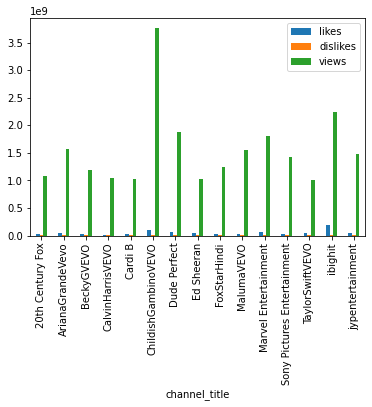

In [52]:
df3[df3["views"] > 1000000000].plot.bar()

In this graph we can see top 10 most liked channels.

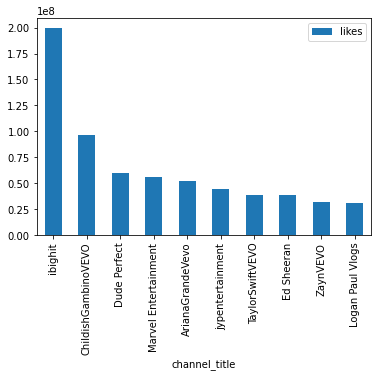

In [53]:
df3 = df3.sort_values(by = "likes", ascending = False)
df3[["likes"]].iloc[:10,:].plot.bar()

Similarly we can see the top 10 most disliked channels.

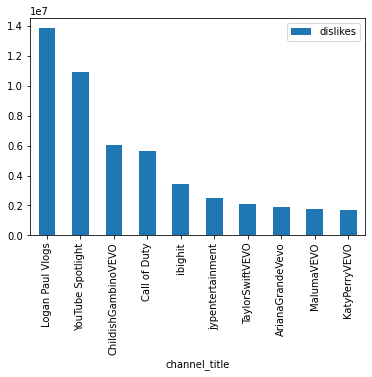

In [54]:
df3 = df3.sort_values(by = "dislikes", ascending = False)
df3[["dislikes"]].iloc[:10,:].plot.bar()

Now we will create a correlation matrix to see how related the data is

In [55]:
correlation_matrix = pd.DataFrame(np.corrcoef(df1[["likes", "views", "dislikes"]],rowvar = False), columns = ["likes", "views", "dislikes"], index = ["likes", "views", "dislikes"])
correlation_matrix

,likes,views,dislikes
likes,1.000000,0.849177,0.447186
views,0.849177,1.000000,0.472213
dislikes,0.447186,0.472213,1.000000


plotting the heatmap of the above correlation matrix helps us visualise the same.

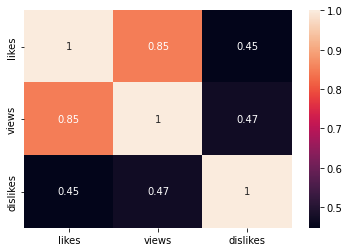

In [56]:
sns.heatmap(correlation_matrix, annot = True)

# **Data prediction**

We will delete values from 10% of the rows from our data set.

In [70]:
df4 = df.copy()
df4.loc[df4.sample(frac = 0.1).index, "likes"] = np.nan
df4

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527.0,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185.0,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033.0,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172.0,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235.0,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40944,BZt0qjTWNhw,18.14.06,The Cat Who Caught the Laser,AaronsAnimals,15,2018-05-18T13:00:04.000Z,"aarons animals|""aarons""|""animals""|""cat""|""cats""...",1685609,38160.0,1385,2657,https://i.ytimg.com/vi/BZt0qjTWNhw/default.jpg,False,False,False,The Cat Who Caught the Laser - Aaron's Animals
40945,1h7KV2sjUWY,18.14.06,True Facts : Ant Mutualism,zefrank1,22,2018-05-18T01:00:06.000Z,[none],1064798,NaN,382,3936,https://i.ytimg.com/vi/1h7KV2sjUWY/default.jpg,False,False,False,NaN
40946,D6Oy4LfoqsU,18.14.06,I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...,Brad Mondo,24,2018-05-18T17:34:22.000Z,I gave safiya nygaard a perfect hair makeover ...,1066451,48068.0,1032,3992,https://i.ytimg.com/vi/D6Oy4LfoqsU/default.jpg,False,False,False,I had so much fun transforming Safiyas hair in...
40947,oV0zkMe1K8s,18.14.06,How Black Panther Should Have Ended,How It Should Have Ended,1,2018-05-17T17:00:04.000Z,"Black Panther|""HISHE""|""Marvel""|""Infinity War""|...",5660813,192957.0,2846,13088,https://i.ytimg.com/vi/oV0zkMe1K8s/default.jpg,False,False,False,How Black Panther Should Have EndedWatch More ...


Let us now check how many cells in **likes** column has null values.
We can see th

In [74]:
df4.shape


(40949, 16)

In [77]:
df4.isnull().sum()


video_id                     0
trending_date                0
title                        0
channel_title                0
category_id                  0
publish_time                 0
tags                         0
views                        0
likes                     4095
dislikes                     0
comment_count                0
thumbnail_link               0
comments_disabled            0
ratings_disabled             0
video_error_or_removed       0
description                570
dtype: int64

In [78]:
df.isnull().sum()

video_id                    0
trending_date               0
title                       0
channel_title               0
category_id                 0
publish_time                0
tags                        0
views                       0
likes                       0
dislikes                    0
comment_count               0
thumbnail_link              0
comments_disabled           0
ratings_disabled            0
video_error_or_removed      0
description               570
dtype: int64

We can see that there exactly 10% of rows which has null values that is 4095 rows from 40949 rows.

We can also verfiy by checking null values from our original data frame.

Separating the rows with **null value** in like column into a new data frame & **without null values** in like column into a new data frame.

In [82]:
df4_w_null_val = df4[df4.likes.isna()]
df4_w_null_val.shape

(4095, 16)

In [83]:
df4_wo_null_val = df4.dropna()
df4_wo_null_val.shape

(36354, 16)

Let us use linear regression model from sklearn to predict values for our null data cell.

In [86]:
estimator = LinearRegression()
estimator.fit(df4_wo_null_val[["views"]], df4_wo_null_val["likes"])
df4_wo_null_val["predicted_likes"] = estimator.predict(df4_wo_null_val[["views"]])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Let us plot a line to help us visualise the predicted data.

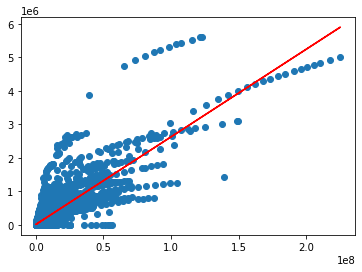

In [89]:
plt.scatter(df4_wo_null_val["views"], df4_wo_null_val["likes"])
plt.plot(df4_wo_null_val["views"], df4_wo_null_val["predicted_likes"], color="red")
plt.show()

We will also see the values in a data frame to see the numbers.

In [90]:
df4_wo_null_val[["likes", "predicted_likes"]]

,likes,predicted_likes
0,57527.0,31922.329877
1,97185.0,75587.368706
2,146033.0,95784.719125
3,10172.0,21330.112209
4,132235.0,67142.683528
...,...,...
40942,676467.0,626724.524541
40943,645888.0,228255.901501
40944,38160.0,56421.960008
40946,48068.0,40236.966924


We can see that prediction is not acurate and linear regerrsion is not the best model for data set has the correlation of our data set is not that good. only views and likes are the 2 columns that correlated but none other columns are correlated to each other hence the linear regerrsion model does not give us a good prediction.